<a href="https://colab.research.google.com/github/vickyaditia/Personal-Project-NLP-Tourism-Review-Sentiment-Analysis-using-KNN-Multi-Output-Classification/blob/main/NLP_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, validation_curve, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
import nltk
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
nama_file_excel = '/content/dataTA.xlsx'

# Membaca data dari file Excel ke dalam DataFrame
dataframe = pd.read_excel(nama_file_excel)

In [ ]:
dataframe.head(12)

,Wisata,id,Ulasan,Atraksi,Amenitas,Aksesbilitas
0,Aek Rangat Pangururan,1,Lokasi pemandian air panas ini wajib dikunjung...,Non Aspek,Positif,Non Aspek
1,Aek Rangat Pangururan,2,Kolam pemandiannya ada di setiap warung². Masi...,Non Aspek,Positif,Non Aspek
2,Aek Rangat Pangururan,3,tempat yg cukup bagus dan pemandangan alam dan...,Positif,Positif,Non Aspek
3,Aek Rangat Pangururan,4,Aek Rangat Pangururan atau air hangat yang ter...,Positif,Positif,Negatif
4,Aek Rangat Pangururan,5,Air panasnya memang panas tercium bau belerang...,Negatif,Negatif,Non Aspek
5,Aek Rangat Pangururan,6,Harus makan dl klo mau mandi air panas yaa!! S...,Non Aspek,Positif,Non Aspek
6,Aek Rangat Pangururan,7,"Untuk bagian danau indah sangat, akan tetapi d...",Positif,Negatif,Non Aspek
7,Aek Rangat Pangururan,8,Kita singgah untuk ngopi dalam perjalanan ke a...,Positif,Non Aspek,Non Aspek
8,Aek Rangat Pangururan,9,"Tempatnya bagus pemandangannya juga indah , pe...",Positif,Positif,Non Aspek
9,Aek Rangat Pangururan,10,"Pemandangan yg sangat bagus, sepanjang jalan d...",Positif,Positif,Positif


In [ ]:
dataframe = dataframe.dropna()
dataframe

,Wisata,id,Ulasan,Atraksi,Amenitas,Aksesbilitas
0,Aek Rangat Pangururan,1,Lokasi pemandian air panas ini wajib dikunjung...,Non Aspek,Positif,Non Aspek
1,Aek Rangat Pangururan,2,Kolam pemandiannya ada di setiap warung². Masi...,Non Aspek,Positif,Non Aspek
2,Aek Rangat Pangururan,3,tempat yg cukup bagus dan pemandangan alam dan...,Positif,Positif,Non Aspek
3,Aek Rangat Pangururan,4,Aek Rangat Pangururan atau air hangat yang ter...,Positif,Positif,Negatif
4,Aek Rangat Pangururan,5,Air panasnya memang panas tercium bau belerang...,Negatif,Negatif,Non Aspek
...,...,...,...,...,...,...
995,Air Terjun Efrata,996,Kereeeen banget Self healing Jalan bagus,Positif,Non Aspek,Positif
996,Air Terjun Efrata,997,Tiket masuk lima ribu rupiah per orang. Kamar ...,Non Aspek,Positif,Non Aspek
997,Air Terjun Efrata,998,Perjalanannya luar biasa 👏👏 View nya bagus sep...,Positif,Negatif,Positif
998,Air Terjun Efrata,999,"Kereeenn.... Dari sidamanik ke sini, gak nyese...",Positif,Positif,Negatif


#Preprocessing Data

**Proses Case Folding**

In [ ]:
# proses case folding
def casefolding(Ulasan):
    Ulasan = Ulasan.lower()
    return Ulasan
datac= dataframe['Ulasan'].apply(casefolding)
datac.head()

0    lokasi pemandian air panas ini wajib dikunjung...
1    kolam pemandiannya ada di setiap warung². masi...
2    tempat yg cukup bagus dan pemandangan alam dan...
3    aek rangat pangururan atau air hangat yang ter...
4    air panasnya memang panas tercium bau belerang...
Name: Ulasan, dtype: object

**Proses Cleansing**

In [ ]:
def cleansing(Ulasan):
    Ulasan = Ulasan.strip(" ")
    # Tidak menyertakan karakter emotikon dalam whitelist
    Ulasan = re.sub(rf'[^{string.ascii_letters}0-9\s]', '', Ulasan)
    Ulasan = re.sub(r'\d+', '', Ulasan)
    Ulasan = re.sub(r"\b[a-zA-Z]\b", "", Ulasan)
    Ulasan = re.sub('\s+',' ', Ulasan)
    Ulasan = re.sub(r'[.,!?"\'():;]|😁', ' ', Ulasan)
    Ulasan = re.sub(r'\b(\w+)\s+\1\b', r'\1', Ulasan)
    # Menghapus kata "nya"
    Ulasan = re.sub(r'\bnya\b', '', Ulasan)
    Ulasan = re.sub(r'\bpondok\b', '', Ulasan)
    Ulasan = re.sub(r'\blah\b', '', Ulasan)

    return Ulasan
datacn= datac.apply(cleansing)
datacn.head()

0    lokasi pemandian air panas ini wajib dikunjung...
1    kolam pemandiannya ada di setiap warung masing...
2    tempat yg cukup bagus dan pemandangan alam dan...
3    aek rangat pangururan atau air hangat yang ter...
4    air panasnya memang panas tercium bau belerang...
Name: Ulasan, dtype: object

In [ ]:
datacn.to_csv('data_cleaning.csv', index=False)

**Proses Normalisasi Data**

In [ ]:
import kamuss
kamuse = kamuss.kamusku()
print(kamuse)

{' affordable': ' terjangkau ', ' area ': ' wilayah ', ' ases ': ' akses ', ' awesome ': ' luar biasa ', ' charger ': ' pengisi daya ', ' challenging ': ' menantang ', 'areanya ': ' wilayahnya ', ' enthausiastic ': ' antusias ', ' atraktf ': ' atraktif ', ' beach ': ' pantai ', ' but ': ' tapi ', ' booking': ' pesan ', ' banaboat ': ' banana boat', ' budget ': ' anggaran ', ' camp ': ' kemah ', ' camping ': ' kemah ', ' direkomendasikan': ' disarankan ', ' merekomendasikan ': ' disarankan ', ' rekomended ': ' disarankan ', ' jogging ': ' jalan ', ' favorit ': ' juara ', ' favorite ': ' juara ', ' fav ': ' juara ', 'free ': ' gratis ', ' guys ': ' teman-teman ', 'good ': ' bagus ', ' good ': ' bagus ', ' guide ': ' pemandu ', '  guidenya': ' pemandunya ', ' gomestay ': ' penginapan ', ' guidance ': ' panduan ', ' no ': ' tidak ', ' resort ': ' tempat istirahat ', ' ratingan ': ' penilaian ', ' hotel ': ' penginapan ', ' hotelnya ': ' penginapannya ', ' hospitalitynya ': ' keramahannya '

In [ ]:
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text
def normalisasi(dt):
    dt = replace_all(dt, kamuse)
    return dt

datacnf = datacn.apply(normalisasi)

In [ ]:
datacnf.head(45)

0     lokasi pemandian air panas ini wajib dikunjung...
1     kolam pemandiannya ada di setiap warung masing...
2     tempat yang cukup bagus dan pemandangan alam d...
3     aek rangat pangururan atau air hangat yang ter...
4     air panasnya memang panas tercium bau belerang...
5     harus makan dulu  kalau mau mandi air panas ya...
6     untuk bagian danau indah sangat akan tetapi di...
7     kita singgah untuk ngopi dalam perjalanan ke a...
8     tempatnya bagus pemandangannya juga indah pela...
9     pemandangan yang sangat bagus sepanjang jalan ...
10    bagus kolam  bisa bua tsekeluarga aja tidak ca...
11    selalu ke sini kalau ke samosir untuk menikmat...
12    selain di sipoholon tarutung pemandian air han...
13    masuk kekolam pemandian tidak bayar cukup deng...
14    pemandian aek rangat usaha kita juara keluarga...
15    salah satu tempat wisata yang wajib dicoba pel...
16    kolam mandi laki dan perempuan terpisahada jug...
17    opsi pilihan lain  untuk menikmati pemandi

**Proses Stopremoval**

In [ ]:
def stop_removal(dt):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    dt = stopword.remove(dt)
    return dt
    # proses stopword removal
datacnft = datacnf.apply(stop_removal)
datacnft.head()

0    lokasi pemandian air panas wajib dikunjungi bi...
1    kolam pemandiannya warung masing ukurannya xm ...
2    tempat cukup bagus pemandangan alam danau toba...
3    aek rangat pangururan air hangat terletak pang...
4    air panasnya memang panas tercium bau belerang...
Name: Ulasan, dtype: object

**Proses Stem**

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(dt):
    dt = stemmer.stem(str(dt))
    return dt

datacnfts = datacnft.apply(stemming)

In [ ]:
datacnfts.iloc[1:100]

1     kolam mandi warung masing ukur xm harga varias...
2     tempat cukup bagus pandang alam danau toba beg...
3     aek rangat pangururan air hangat letak panguru...
4     air panas memang panas cium bau belerang kolam...
5     makan dulu kalau mau mandi air panas saya maka...
                            ...                        
95    tempat sangat tarik cukup beli makan minum dap...
96    kolam kurang tarik tidak ikut jaman sayang sek...
97    segeeerr mandi air panas tiket masuk orang dew...
98                pandang bagus banget pilih menu batas
99    pandang indah ramah lingkungancocok daerah wisata
Name: Ulasan, Length: 99, dtype: object

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def word_tokenize_wrapper(text):
 return word_tokenize(text)
datacnftsx = datacnfts.apply(word_tokenize_wrapper)
datacnftsx.head()

0    [lokasi, mandi, air, panas, wajib, kunjung, bi...
1    [kolam, mandi, warung, masing, ukur, xm, harga...
2    [tempat, cukup, bagus, pandang, alam, danau, t...
3    [aek, rangat, pangururan, air, hangat, letak, ...
4    [air, panas, memang, panas, cium, bau, beleran...
Name: Ulasan, dtype: object

In [ ]:
hasilprapro = pd.DataFrame({ 'Ulasan' : datacnftsx , 'Atraksi' : dataframe['Atraksi'], 'Amenitas' : dataframe['Amenitas'], 'Aksesbilitas' : dataframe['Aksesbilitas']})

In [ ]:
hasilprapro

,Ulasan,Atraksi,Amenitas,Aksesbilitas
0,"[lokasi, mandi, air, panas, wajib, kunjung, bi...",Non Aspek,Positif,Non Aspek
1,"[kolam, mandi, warung, masing, ukur, xm, harga...",Non Aspek,Positif,Non Aspek
2,"[tempat, cukup, bagus, pandang, alam, danau, t...",Positif,Positif,Non Aspek
3,"[aek, rangat, pangururan, air, hangat, letak, ...",Positif,Positif,Negatif
4,"[air, panas, memang, panas, cium, bau, beleran...",Negatif,Negatif,Non Aspek
...,...,...,...,...
995,"[keren, banget, sembuh, diri, jalan, bagus]",Positif,Non Aspek,Positif
996,"[tiket, masuk, lima, ribu, rupiah, per, orang,...",Non Aspek,Positif,Non Aspek
997,"[jalan, luar, biasa, pandang, bagus, panjang, ...",Positif,Negatif,Positif
998,"[keren, sidamanik, sini, nyesel, cape, emang, ...",Positif,Positif,Negatif


In [ ]:
X = hasilprapro['Ulasan']
y = hasilprapro.drop(['Ulasan'], axis=1)

In [ ]:
count1 = y['Amenitas'].value_counts()
count2 = y['Atraksi'].value_counts()
count3 = y['Aksesbilitas'].value_counts()
print("Count Amenitas:")
print(count1)
print("\n-----\n")
print("Count Atraksi:")
print(count2)
print("\n-----\n")
print("Count Aksesbilitas:")
print(count3)

Count Amenitas:
Non Aspek    515
Positif      295
Negatif      190
Name: Amenitas, dtype: int64

-----

Count Atraksi:
Positif      712
Non Aspek    255
Negatif       33
Name: Atraksi, dtype: int64

-----

Count Aksesbilitas:
Non Aspek    793
Positif      112
Negatif       95
Name: Aksesbilitas, dtype: int64


Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TF-IDF

In [ ]:
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train.astype(str))
X_test_tfidf = vectorizer.transform(X_test.astype(str))

X_train = pd.DataFrame(X_train_tfidf.toarray(), columns = vectorizer.get_feature_names_out())
X_test = pd.DataFrame(X_test_tfidf.toarray(), columns = vectorizer.get_feature_names_out())
print(X_train)

     aamiin  abadi  abis  acara  aceh       ada  adab  adakan  adalah  adapun  \
0       0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   
1       0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   
2       0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   
3       0.0    0.0   0.0    0.0   0.0  0.141965   0.0     0.0     0.0     0.0   
4       0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   
..      ...    ...   ...    ...   ...       ...   ...     ...     ...     ...   
795     0.0    0.0   0.0    0.0   0.0  0.198391   0.0     0.0     0.0     0.0   
796     0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   
797     0.0    0.0   0.0    0.0   0.0  0.140977   0.0     0.0     0.0     0.0   
798     0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   
799     0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   

     ...  yaah  yah  yahya 

In [ ]:
print(X_test)

     aamiin  abadi  abis  acara  aceh       ada  adab  adakan  adalah  adapun  \
0       0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   
1       0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   
2       0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   
3       0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   
4       0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   
..      ...    ...   ...    ...   ...       ...   ...     ...     ...     ...   
195     0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   
196     0.0    0.0   0.0    0.0   0.0  0.108185   0.0     0.0     0.0     0.0   
197     0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   
198     0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   
199     0.0    0.0   0.0    0.0   0.0  0.000000   0.0     0.0     0.0     0.0   

     ...  yaah  yah  yahya 

KNN

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
knn_model = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=3))
knn_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=3))

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred

array([['Non Aspek', 'Non Aspek', 'Non Aspek'],
       ['Non Aspek', 'Non Aspek', 'Non Aspek'],
       ['Non Aspek', 'Non Aspek', 'Non Aspek'],
       ['Positif', 'Non Aspek', 'Non Aspek'],
       ['Non Aspek', 'Non Aspek', 'Non Aspek'],
       ['Positif', 'Non Aspek', 'Non Aspek'],
       ['Positif', 'Non Aspek', 'Negatif'],
       ['Positif', 'Non Aspek', 'Non Aspek'],
       ['Positif', 'Non Aspek', 'Non Aspek'],
       ['Non Aspek', 'Non Aspek', 'Non Aspek'],
       ['Positif', 'Non Aspek', 'Non Aspek'],
       ['Non Aspek', 'Non Aspek', 'Non Aspek'],
       ['Positif', 'Non Aspek', 'Non Aspek'],
       ['Positif', 'Non Aspek', 'Non Aspek'],
       ['Positif', 'Non Aspek', 'Non Aspek'],
       ['Non Aspek', 'Non Aspek', 'Non Aspek'],
       ['Positif', 'Non Aspek', 'Non Aspek'],
       ['Non Aspek', 'Non Aspek', 'Non Aspek'],
       ['Non Aspek', 'Non Aspek', 'Non Aspek'],
       ['Positif', 'Non Aspek', 'Non Aspek'],
       ['Non Aspek', 'Non Aspek', 'Non Aspek'],
       ['Non Asp

In [ ]:
accuracy_1 = accuracy_score(y_test['Atraksi'], y_pred[:, 0])
accuracy_2 = accuracy_score(y_test['Amenitas'], y_pred[:, 1])
accuracy_3 = accuracy_score(y_test['Aksesbilitas'], y_pred[:, 2])

In [ ]:
print("Accuracy for target1:", accuracy_1)
print("Accuracy for target2:", accuracy_2)
print("Accuracy for target3:", accuracy_3)

Accuracy for target1: 0.61
Accuracy for target2: 0.59
Accuracy for target3: 0.795


Tuning

In [ ]:
param_range = np.arange(1, 30)

train_scores_Atraksi, test_scores_Atraksi = [], []
train_scores_Amenitas, test_scores_Amenitas = [], []
train_scores_Aksesbilitas, test_scores_Aksesbilitas = [], []

for n_neighbors in param_range:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    multi_knn_model = MultiOutputClassifier(knn_model)

    # Train the model
    multi_knn_model.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = multi_knn_model.predict(X_train)
    train_accuracy_Atraksi = accuracy_score(y_train['Atraksi'], y_train_pred[:, 0])
    train_accuracy_Amenitas = accuracy_score(y_train['Amenitas'], y_train_pred[:, 1])
    train_accuracy_Aksesbilitas = accuracy_score(y_train['Aksesbilitas'], y_train_pred[:, 2])

    train_scores_Atraksi.append(train_accuracy_Atraksi)
    train_scores_Amenitas.append(train_accuracy_Amenitas)
    train_scores_Aksesbilitas.append(train_accuracy_Aksesbilitas)

    # Predict on test set
    y_test_pred = multi_knn_model.predict(X_test)
    test_accuracy_Atraksi = accuracy_score(y_test['Atraksi'], y_test_pred[:, 0])
    test_accuracy_Amenitas = accuracy_score(y_test['Amenitas'], y_test_pred[:, 1])
    test_accuracy_Aksesbilitas = accuracy_score(y_test['Aksesbilitas'], y_test_pred[:, 2])

    test_scores_Atraksi.append(test_accuracy_Atraksi)
    test_scores_Amenitas.append(test_accuracy_Amenitas)
    test_scores_Aksesbilitas.append(test_accuracy_Aksesbilitas)

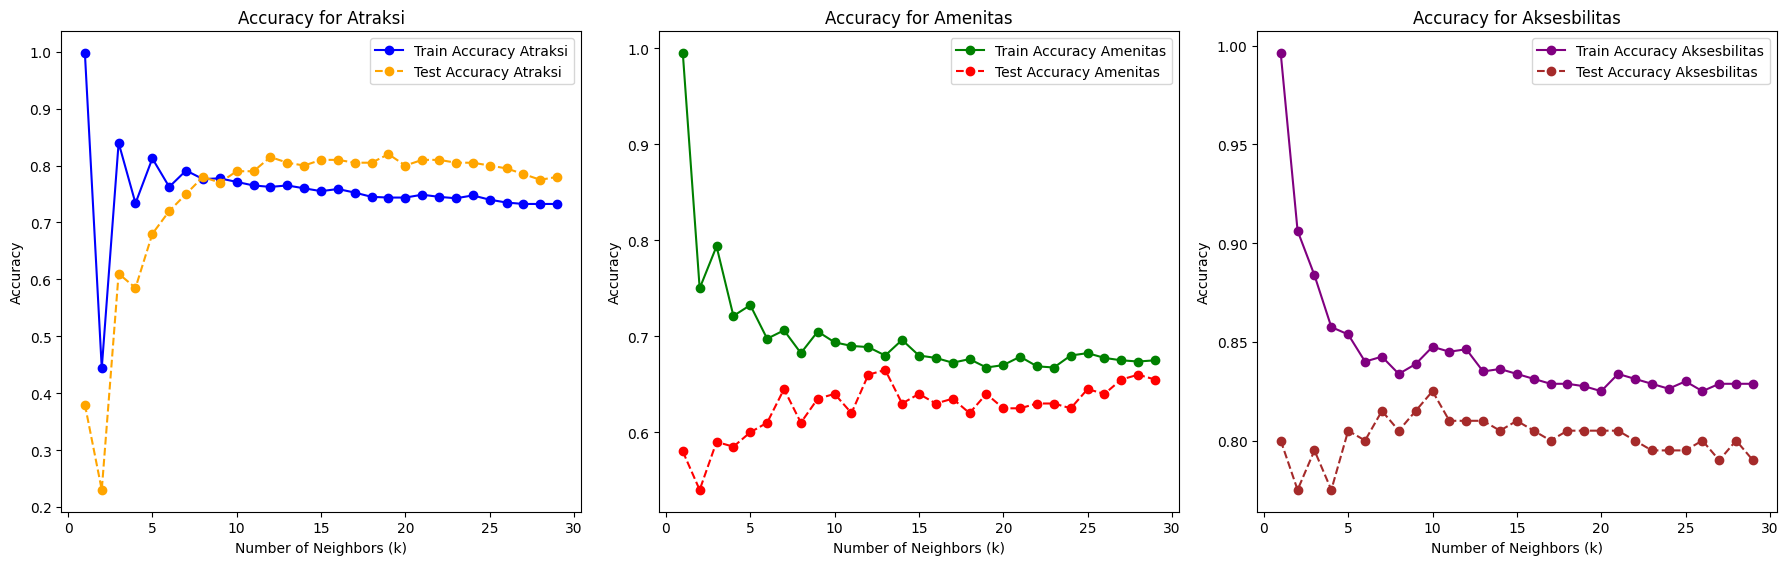

In [ ]:
plt.figure(figsize=(18, 6))

# Plot Train and Test Accuracy Atraksi
plt.subplot(1, 3, 1)
plt.plot(param_range, train_scores_Atraksi, label='Train Accuracy Atraksi', marker='o', color='blue')
plt.plot(param_range, test_scores_Atraksi, label='Test Accuracy Atraksi', marker='o', linestyle='dashed', color='orange')
plt.title('Accuracy for Atraksi')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()

# Plot Train and Test Accuracy Amenitas
plt.subplot(1, 3, 2)
plt.plot(param_range, train_scores_Amenitas, label='Train Accuracy Amenitas', marker='o', color='green')
plt.plot(param_range, test_scores_Amenitas, label='Test Accuracy Amenitas', marker='o', linestyle='dashed', color='red')
plt.title('Accuracy for Amenitas')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()

# Plot Train and Test Accuracy Aksesbilitas
plt.subplot(1, 3, 3)
plt.plot(param_range, train_scores_Aksesbilitas, label='Train Accuracy Aksesbilitas', marker='o', color='purple')
plt.plot(param_range, test_scores_Aksesbilitas, label='Test Accuracy Aksesbilitas', marker='o', linestyle='dashed', color='brown')
plt.title('Accuracy for Aksesbilitas')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

kita bisa lihat bahwa pada tampilan diatas, model paling bagus yaitu pada saat k = 21

In [ ]:
model = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=13))
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=13))

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_1 = accuracy_score(y_test['Atraksi'], y_pred[:, 0])
accuracy_2 = accuracy_score(y_test['Amenitas'], y_pred[:, 1])
accuracy_3 = accuracy_score(y_test['Aksesbilitas'], y_pred[:, 2])

In [ ]:
print("Accuracy for Atraksi:", accuracy_1)
print("Accuracy for Amenitas:", accuracy_2)
print("Accuracy for Aksesbilitas:", accuracy_3)

Accuracy for Atraksi: 0.805
Accuracy for Amenitas: 0.665
Accuracy for Aksesbilitas: 0.81
